In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk



from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold


from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import log_loss

from tqdm.notebook import tqdm

In [5]:
df = pd.read_csv('train.csv')

In [6]:
target = df["target"]
df = df.drop(labels="target", axis = 1);
df.insert(0, "target", target)

In [7]:
label = list(df.columns.values)
n,p = df.shape
print(label)
print(n,p)

['target', 'id', 'AP', 'creation_date_answer', 'situation', 'ctc', 'location', 'gc_id', 'gc_label', 'creation_date_global', 'id_group', 'id_group_2', 'favorite_fruit', 'fruit_situation_id', 'fruit_situation_label', 'fruits_or_vegetables', 'number_of_fruit', 'id_group_3', 'creation_date_request', 'hobby', 'id_group_4', 'ville', 'green_vegetables', 'vegetable_type']
25000 24


In [8]:
print("Suppression des colonnes NA")

to_delete=[]

for l in label:
    count_NA = df[l].isna().sum()
    if(count_NA>0):
        print(l+ ":  " + str(count_NA))
        to_delete.append(l)

df = df.drop(labels=to_delete, axis = 1);

Suppression des colonnes NA
ctc:  15380
fruit_situation_label:  1728
fruits_or_vegetables:  17341
ville:  16912
vegetable_type:  24586


In [9]:
print("Suppression des colonnes non exploitables")

df = df.drop(labels=["id","id_group","id_group_2","id_group_3","id_group_4"], axis = 1);

Suppression des colonnes non exploitables


In [10]:
print("Colonnes contenant même info: gc_id & gc_label")
#print(df['gc_id'].value_counts())
#print(df['gc_label'].value_counts())
print("On en supprime une des deux: gc_label")
df=df.drop(columns =['gc_label']);

Colonnes contenant même info: gc_id & gc_label
On en supprime une des deux: gc_label


In [11]:
print(df["creation_date_answer"][0])

year_creation_date_answer = []
month_creation_date_answer = []
day_creation_date_answer = []
hour_creation_date_answer = []

for i in range(n):
    s = df["creation_date_answer"][i]
    
    year_creation_date_answer.append(int(s[0:4]))
    month_creation_date_answer.append(int(s[5:7]))
    day_creation_date_answer.append(int(s[8:10]))
    hour_creation_date_answer.append(int(s[11:13]))

print(year_creation_date_answer[0],month_creation_date_answer[0],day_creation_date_answer[0],hour_creation_date_answer[0])

df=df.drop(columns =['creation_date_answer']);
df['year_creation_date_answer'] = year_creation_date_answer
df['month_creation_date_answer'] = month_creation_date_answer
df['day_creation_date_answer'] = day_creation_date_answer
df['hour_creation_date_answer'] = hour_creation_date_answer

2019-03-13 11:14:42.549
2019 3 13 11


In [12]:
print(df["creation_date_global"][0])

year_creation_date_global = []
month_creation_date_global = []
day_creation_date_global = []
hour_creation_date_global = []

for i in range(n):
    s = df["creation_date_global"][i]
    
    year_creation_date_global.append(int(s[0:4]))
    month_creation_date_global.append(int(s[5:7]))
    day_creation_date_global.append(int(s[8:10]))
    hour_creation_date_global.append(int(s[11:13]))

print(year_creation_date_global[0],month_creation_date_global[0],day_creation_date_global[0],hour_creation_date_global[0])

df=df.drop(columns =['creation_date_global']);
df['year_creation_date_global'] = year_creation_date_global
df['month_creation_date_global'] = month_creation_date_global
df['day_creation_date_global'] = day_creation_date_global
df['hour_creation_date_global'] = hour_creation_date_global

2019-01-17 10:50:57.767
2019 1 17 10


In [13]:
print(df["creation_date_request"][0])

year_creation_date_request = []
month_creation_date_request = []
day_creation_date_request = []
hour_creation_date_request = []

for i in range(n):
    s = df["creation_date_request"][i]
    
    year_creation_date_request.append(int(s[0:4]))
    month_creation_date_request.append(int(s[5:7]))
    day_creation_date_request.append(int(s[8:10]))
    hour_creation_date_request.append(int(s[11:13]))

print(year_creation_date_request[0],month_creation_date_request[0],day_creation_date_request[0],hour_creation_date_request[0])

df=df.drop(columns =['creation_date_request']);
df['year_creation_date_request'] = year_creation_date_request
df['month_creation_date_request'] = month_creation_date_request
df['day_creation_date_request'] = day_creation_date_request
df['hour_creation_date_request'] = hour_creation_date_request

2019-03-13 11:14:42.549
2019 3 13 11


In [14]:
label = list(df.columns.values)
n,p = df.shape
print(n,p)
print(label)

25000 22
['target', 'AP', 'situation', 'location', 'gc_id', 'favorite_fruit', 'fruit_situation_id', 'number_of_fruit', 'hobby', 'green_vegetables', 'year_creation_date_answer', 'month_creation_date_answer', 'day_creation_date_answer', 'hour_creation_date_answer', 'year_creation_date_global', 'month_creation_date_global', 'day_creation_date_global', 'hour_creation_date_global', 'year_creation_date_request', 'month_creation_date_request', 'day_creation_date_request', 'hour_creation_date_request']


In [15]:
print("Suppression des colonnes 1 occurence")

to_delete=[]

for l in label:
    count_occ = df[l].nunique()
    print(l+": "+str(count_occ))
    if(count_occ == 1): to_delete.append(l)

df = df.drop(labels=to_delete, axis = 1);

Suppression des colonnes 1 occurence
target: 4
AP: 2
situation: 8
location: 99
gc_id: 12
favorite_fruit: 2
fruit_situation_id: 22
number_of_fruit: 9
hobby: 3
green_vegetables: 2
year_creation_date_answer: 1
month_creation_date_answer: 3
day_creation_date_answer: 31
hour_creation_date_answer: 24
year_creation_date_global: 9
month_creation_date_global: 12
day_creation_date_global: 31
hour_creation_date_global: 24
year_creation_date_request: 1
month_creation_date_request: 3
day_creation_date_request: 31
hour_creation_date_request: 24


In [13]:
label = list(df.columns.values)
n,p = df.shape
print(n,p)
print(label)

25000 20
['target', 'AP', 'situation', 'location', 'gc_id', 'favorite_fruit', 'fruit_situation_id', 'number_of_fruit', 'hobby', 'green_vegetables', 'month_creation_date_answer', 'day_creation_date_answer', 'hour_creation_date_answer', 'year_creation_date_global', 'month_creation_date_global', 'day_creation_date_global', 'hour_creation_date_global', 'month_creation_date_request', 'day_creation_date_request', 'hour_creation_date_request']


In [14]:
str_lab=[]

for l in label:
    print(l+": "+str(type(df[l][0])))
    if(type(df[l][0])==type("a")): str_lab.append(l)

print("\n"*2)        
        
for l in str_lab:
    col = df[l].unique()
    print(col)
    for i in range(len(col)-1):
        new_col = (df[l]== col[i])
        df[l+" "+str(i)] = new_col
    df = df.drop(labels=l, axis = 1);

target: <class 'numpy.int64'>
AP: <class 'str'>
situation: <class 'numpy.int64'>
location: <class 'numpy.int64'>
gc_id: <class 'numpy.int64'>
favorite_fruit: <class 'str'>
fruit_situation_id: <class 'numpy.int64'>
number_of_fruit: <class 'numpy.int64'>
hobby: <class 'str'>
green_vegetables: <class 'str'>
month_creation_date_answer: <class 'numpy.int64'>
day_creation_date_answer: <class 'numpy.int64'>
hour_creation_date_answer: <class 'numpy.int64'>
year_creation_date_global: <class 'numpy.int64'>
month_creation_date_global: <class 'numpy.int64'>
day_creation_date_global: <class 'numpy.int64'>
hour_creation_date_global: <class 'numpy.int64'>
month_creation_date_request: <class 'numpy.int64'>
day_creation_date_request: <class 'numpy.int64'>
hour_creation_date_request: <class 'numpy.int64'>



['f' 't']
['poire' 'clementine']
['football' 'volleyball' 'noball']
['f' 't']


In [15]:
label = list(df.columns.values)
n,p = df.shape
print(n,p)
print(label)

25000 21
['target', 'situation', 'location', 'gc_id', 'fruit_situation_id', 'number_of_fruit', 'month_creation_date_answer', 'day_creation_date_answer', 'hour_creation_date_answer', 'year_creation_date_global', 'month_creation_date_global', 'day_creation_date_global', 'hour_creation_date_global', 'month_creation_date_request', 'day_creation_date_request', 'hour_creation_date_request', 'AP 0', 'favorite_fruit 0', 'hobby 0', 'hobby 1', 'green_vegetables 0']


In [16]:
corr=df.corr()
#plt.matshow(corr)
corr.style.background_gradient(cmap='coolwarm')

,target,situation,location,gc_id,fruit_situation_id,number_of_fruit,month_creation_date_answer,day_creation_date_answer,hour_creation_date_answer,year_creation_date_global,month_creation_date_global,day_creation_date_global,hour_creation_date_global,month_creation_date_request,day_creation_date_request,hour_creation_date_request,AP 0,favorite_fruit 0,hobby 0,hobby 1,green_vegetables 0
target,1.000000,0.001983,-0.020473,0.041049,-0.412233,0.037076,-0.049360,-0.014224,-0.107345,-0.084534,0.117298,0.026336,-0.021385,-0.049506,-0.013912,-0.108013,0.000345,0.041094,0.002765,-0.007626,-0.042520
situation,0.001983,1.000000,-0.024445,0.118824,-0.006258,0.314255,0.001087,0.000651,-0.038102,0.006642,0.003265,0.010500,0.006814,0.001095,0.000658,-0.038029,0.009699,0.147834,0.008062,-0.006695,-0.074065
location,-0.020473,-0.024445,1.000000,-0.022510,0.060436,-0.036544,0.000303,0.003274,0.135059,0.017465,0.003516,-0.027087,0.103698,0.000311,0.003190,0.135819,-0.008646,-0.027014,0.007058,-0.008097,-0.001110
gc_id,0.041049,0.118824,-0.022510,1.000000,-0.026021,0.219846,0.009773,-0.001890,-0.069280,0.073431,-0.005851,0.001432,0.069471,0.009803,-0.001850,-0.069218,0.024867,0.747461,0.012501,-0.009025,-0.007211
fruit_situation_id,-0.412233,-0.006258,0.060436,-0.026021,1.000000,-0.011165,0.033383,0.012893,0.127785,0.077426,-0.098038,-0.028500,0.013556,0.033447,0.012788,0.127892,0.012454,-0.003586,-0.005561,0.001150,0.038643
number_of_fruit,0.037076,0.314255,-0.036544,0.219846,-0.011165,1.000000,0.000240,-0.003666,-0.063322,-0.110291,0.025859,-0.009882,-0.088315,0.000264,-0.003662,-0.062961,0.002546,0.233650,0.005114,-0.002310,-0.057488
month_creation_date_answer,-0.049360,0.001087,0.000303,0.009773,0.033383,0.000240,1.000000,-0.024390,-0.015000,0.129958,-0.137524,-0.009398,0.003342,0.999971,-0.024255,-0.014856,0.009799,0.004798,0.014409,-0.014642,-0.001743
day_creation_date_answer,-0.014224,0.000651,0.003274,-0.001890,0.012893,-0.003666,-0.024390,1.000000,0.010777,0.055453,-0.072833,0.105109,-0.004872,-0.024397,0.999892,0.010586,0.007960,0.003107,-0.004254,0.007214,-0.005699
hour_creation_date_answer,-0.107345,-0.038102,0.135059,-0.069280,0.127785,-0.063322,-0.015000,0.010777,1.000000,0.048549,-0.055194,0.010352,0.183309,-0.015124,0.010726,0.999008,0.006546,-0.083404,-0.010026,-0.004147,0.016235
year_creation_date_global,-0.084534,0.006642,0.017465,0.073431,0.077426,-0.110291,0.129958,0.055453,0.048549,1.000000,-0.607195,-0.083005,0.317246,0.129973,0.055380,0.048389,0.032864,0.080329,-0.002747,0.002659,-0.016684


In [17]:
df.to_csv('train_clean.csv')

In [18]:
X_=df.iloc[:,1:].to_numpy()
y_=df['target'].to_numpy()

n,p=X_.shape

X, X_valid, y, y_valid = train_test_split(X_, y_, test_size=0.2, random_state=42,stratify=y_)

n_train=y.size
n_valid=y_valid.size


#matrice des probas
Y=np.zeros((n_train,4))
Y_valid=np.zeros((n_valid,4))

for i in range(4):
    Y[:,i]=(y==i)
    Y_valid[:,i]=(y_valid==i)

print("Shape of train X,y,Y: ",X.shape,y.shape,Y.shape)
print("Shape of valid X,y,Y: ",X_valid.shape,y_valid.shape,Y_valid.shape)

Shape of train X,y,Y:  (20000, 20) (20000,) (20000, 4)
Shape of valid X,y,Y:  (5000, 20) (5000,) (5000, 4)


In [18]:
#Poids
print("On construit nos poids et on vérifie que l'on a bien gardé les mêmes proportions de classe dans nos différents splits\n")

#print(df['target'].value_counts(),"\n")
#print(np.asarray(np.unique(y, return_counts=True)).T)
#print(np.asarray(np.unique(y_valid, return_counts=True)).T)


weight = {0:1,1:10,2:100,3:1000}
print("Poids: ", weight)

Weight = 10**y #pratique
Weight_valid = 10**y_valid

On construit nos poids et on vérifie que l'on a bien gardé les mêmes proportions de classe dans nos différents splits

Poids:  {0: 1, 1: 10, 2: 100, 3: 1000}


In [19]:
K_fold=5
skf = StratifiedKFold(n_splits=K_fold)
print(skf)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


In [20]:
WLogLoss=[]

for train, test in tqdm(skf.split(X, y)):
    clf_reg = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=5000, tol=1e-2)
    clf_reg = clf_reg.fit(X[train], y[train], sample_weight=Weight[train])

    Y_hat_test = clf_reg.predict_proba(X[test])
    WLogLoss.append(log_loss(Y[test], Y_hat_test ,sample_weight=Weight[test]))


print("Biais: ", np.mean(WLogLoss))
print("Variance: ", np.var(WLogLoss))

0it [00:00, ?it/s]

C:\Users\Vfarc\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Biais:  0.9921849135962232
Variance:  0.000564526703516635


In [21]:
clf_reg = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=3000, tol=1e-2)
clf_reg = clf_reg.fit(X, y, sample_weight=Weight)

Y_hat_train_regLoss = clf_reg.predict_proba(X)
Y_hat_valid_regLoss = clf_reg.predict_proba(X_valid)


print("Train Loss(Reg Loss):",log_loss(Y,Y_hat_train_regLoss,sample_weight=Weight))
print("\n")
print("Test Loss(Reg Loss): ",log_loss(Y_valid,Y_hat_valid_regLoss,sample_weight=Weight_valid))
print("Test Loss (Proba unif): ",log_loss(Y_valid,np.ones((n_valid,4))*0.25,sample_weight=Weight_valid))

Train Loss(Reg Loss): 0.9732095187252786


Test Loss(Reg Loss):  0.9781505587290399
Test Loss (Proba unif):  1.3862943611198906


C:\Users\Vfarc\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
min_samples_leaf = 10**np.linspace(-1.5,-0.1,20)

WLogLoss_min_samples=[]

for i in tqdm(min_samples_leaf):
    WLogLoss_i=[]
    for train, test in skf.split(X, y):
        clf_tree = sk.tree.DecisionTreeClassifier(criterion="log_loss", max_depth = None, min_samples_leaf = i)    
        clf_tree = clf_tree.fit(X[train], y[train], sample_weight=Weight[train])

        Y_hat_test=clf_tree.predict_proba(X[test])
        WLogLoss_i.append(log_loss(Y[test], Y_hat_test, sample_weight=Weight[test]))
    WLogLoss_min_samples.append(WLogLoss_i)


  0%|          | 0/20 [00:00<?, ?it/s]

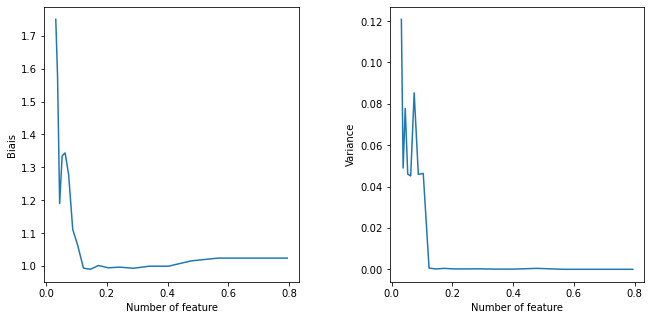

In [23]:
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2)

ax0.plot(min_samples_leaf,np.mean(WLogLoss_min_samples,axis=1))

ax0.set_xlabel("Number of feature");
ax0.set_ylabel("Biais");


ax1.plot(min_samples_leaf,np.var(WLogLoss_min_samples,axis=1))

ax1.set_xlabel("Number of feature");
ax1.set_ylabel("Variance");

fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
plt.subplots_adjust(left=None, bottom=None, right=1.5, top=1.10, wspace=None, hspace=None)

In [24]:
WLogLoss=[]

for train, test in tqdm(skf.split(X, y)):
    clf_tree = sk.tree.DecisionTreeClassifier(criterion="log_loss",max_depth=None,min_samples_leaf=0.15)    
    clf_tree = clf_tree.fit(X[train], y[train], sample_weight=Weight[train])

    Y_hat_test = clf_tree.predict_proba(X[test])
    WLogLoss.append(log_loss(Y[test], Y_hat_test, sample_weight=Weight[test] ))


print("Biais: ",np.mean(WLogLoss))
print("Variance: ",np.var(WLogLoss))

0it [00:00, ?it/s]

Biais:  0.9902767214607502
Variance:  0.00015827686656541963


In [25]:
clf_tree = sk.tree.DecisionTreeClassifier(criterion="log_loss", max_depth=None, min_samples_leaf=0.15)
clf_tree = clf_tree.fit(X,y,sample_weight=Weight);

Y_hat_train_tree = clf_tree.predict_proba(X)
Y_hat_valid_tree = clf_tree.predict_proba(X_valid)

print("Train Loss(Tree Loss):",log_loss(Y,Y_hat_train_tree,sample_weight=Weight))
print("\n")
print("Test Loss(Tree Loss): ",log_loss(Y_valid,Y_hat_valid_tree,sample_weight=Weight_valid))
print("Test Loss(Reg Loss): ",log_loss(Y_valid,Y_hat_valid_regLoss,sample_weight=Weight_valid))
print("Test Loss (Proba unif): ",log_loss(Y_valid,np.ones((n_valid,4))*0.25,sample_weight=Weight_valid))

Train Loss(Tree Loss): 0.9743420016251731


Test Loss(Tree Loss):  0.9977112190872154
Test Loss(Reg Loss):  0.9781505587290399
Test Loss (Proba unif):  1.3862943611198906


In [26]:
#'''
#n_estim = np.arange(5,225,20)
n_estim  = np.concatenate([np.arange(5,220,45),np.arange(200,450,50)])

WLogLoss_nestim=[]


for i in tqdm(n_estim):
    WLogLoss_i=[]
    for train, test in tqdm(skf.split(X, y)):
        clf_boosting = GradientBoostingClassifier(loss="log_loss",learning_rate=0.1,n_estimators=int(i))  
        clf_boosting = clf_boosting.fit(X[train], y[train], sample_weight=Weight[train])

        Y_hat_test=clf_boosting.predict_proba(X[test])
        WLogLoss_i.append(log_loss(Y[test], Y_hat_test, sample_weight=Weight[test]))
    WLogLoss_nestim.append(WLogLoss_i)
#''';

  0%|          | 0/10 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

KeyboardInterrupt: 

In [ ]:
#'''
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2)

ax0.plot(n_estim,np.mean(WLogLoss_nestim,axis=1))

ax0.set_xlabel("Number of tree");
ax0.set_ylabel("Biais");


ax1.plot(n_estim,np.var(WLogLoss_nestim,axis=1))

ax1.set_xlabel("Number of tree");
ax1.set_ylabel("Variance");

fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
plt.subplots_adjust(left=None, bottom=None, right=1.5, top=1.10, wspace=None, hspace=None)
#''';

In [ ]:
#'''
lr=np.linspace(0.01,0.5,20)
WLogLoss_lr=[]

for i in tqdm(lr):
    WLogLoss_i=[]
    for train, test in tqdm(skf.split(X, y)):
        clf_boosting = GradientBoostingClassifier(loss="log_loss",learning_rate=i,n_estimators=100) 
        clf_boosting = clf_boosting.fit(X[train], y[train], sample_weight=Weight[train])

        Y_hat_test=clf_boosting.predict_proba(X[test])
        WLogLoss_i.append(log_loss(Y[test], Y_hat_test, sample_weight=Weight[test] ))
    WLogLoss_lr.append(WLogLoss_i)

#''';

In [ ]:
#'''
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2)

ax0.plot(lr,np.mean(WLogLoss_lr,axis=1))
ax0.set_xlabel("Learning rate");
ax0.set_ylabel("Biais");


ax1.plot(lr,np.var(WLogLoss_lr,axis=1))

ax1.set_xlabel("Learning rate");
ax1.set_ylabel("Variance");

fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
plt.subplots_adjust(left=None, bottom=None, right=1.5, top=1.10, wspace=None, hspace=None)
#''';

In [ ]:
clf_boosting = GradientBoostingClassifier(loss="log_loss",learning_rate=0.1,n_estimators=100,max_depth=3)
clf_boosting = clf_boosting.fit(X, y,sample_weight=Weight)

Y_hat_train_boosting=clf_boosting.predict_proba(X)
Y_hat_valid_boosting=clf_boosting.predict_proba(X_valid)

print("Train Loss(Tree+Boosting):",log_loss(Y,Y_hat_train_boosting,sample_weight=Weight))
print("\n")
print("Test Loss(Tree+Boosting): ",log_loss(Y_valid,Y_hat_valid_boosting,sample_weight=Weight_valid))
print("Test Loss(Tree): ",log_loss(Y_valid,Y_hat_valid_tree,sample_weight=Weight_valid))
print("Test Loss(Reg Loss): ",log_loss(Y_valid,Y_hat_valid_regLoss,sample_weight=Weight_valid))